<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/Coloma%2C_Orbe%2C_Posso_Deber_2_Islands_in_the_sea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



>  # Universidad de las Americas

**Integrantes:** Kevin Coloma, Fernando Orbe, Martin Posso

#HW 2 : Island in the sea (15%)
Model a Self Avoiding Random Walk (SARW) such that:
The limits are the origin (0, 0) ±(10,10), (dotted black square).
The origin (0,0) can be visited again.
* If visited the walks ends.
* An island is formed, see examples below.
* An island must have Area>0.
Apart from the items above the walk behaves as a traditional SARW

#Answer:
(8%) What is the probability for a island SARW (iSARW) to return to the origin.
The formed island must have Area>0, i.e. the minimum number of steps for an iSARW is 4.
* (1%) What is the probability for an iSARW returning to the origin
* to have odd steps,
* to have even steps.
* (6%) What is the mean step for the returning iSARWs.

#Optional:

* Answer the questions above for a traditional SARW (the origin cannot be visited).

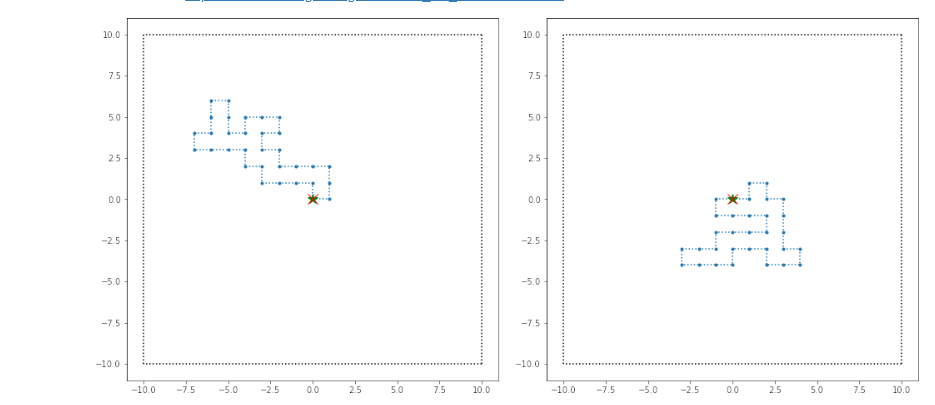




In [ ]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time

In [ ]:
def generateMove(x, y): #funcion que genera los movimientos
    return [(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)] #retorna todos los movimientos

def SARW(steps = 10, origin = (0, 0)): #funcion para poder generar el movimiento random
  positions = [] #array donde se almacena todos los movimientos
  positions.append(origin)
  x, y = [0], [0] #variables de X y Y para poder graficar

  stuck = 0 #variable para detectar si paro el SARW
  returned = 0 #variable para saber si llego al origen
  movements = 0 #contador para el numero de movimientos

  for i in range(steps): #loop para generar los pasos random
    moves = generateMove(x[-1], y[-1]) #obtenemos los movimientos
    availables = [] #array para obtener los pasos que si se pueden dar
    movements += 1 #contador de pasos
    for mx, my in moves: #for para obtener los valores X y Y
      if (mx, my) not in positions: #si es que no se encuentra X y Y dentro del array de todos los movimientos
        availables.append((mx, my)) #guardamos en esa posicion
      if (0, 0) in moves and movements > 4: #permite que regrese al origen cuando el numero de pasos sea mayor a 4
        availables.append((0, 0)) #guardamos el origen
    if availables: #si es que hay posiciones
      mx, my = availables[np.random.choice(len(availables))] #obtengo un valor X y Y random dentro de las opciones
      positions.append((mx, my)) #actualizamos X y Y en el arreglo de posiciones
      x.append(mx) #guradamos X y Y para graficar
      y.append(my)
    else:
      stuck = 1 #nos de vuelve si se quedo en un paso
      movements = i + 1
      break

    if origin in positions[1:]:
      returned = 1
      movements = i + 1
      break
  return x, y, stuck, movements, returned

def graficar(steps = 10, iterations = 10): #funcion para graficar
  nReturn = 0
  oddSteps = 0
  EvenSteps = 0

  probR = 0
  probO = 0
  probE = 0

  allSteps = 0

  fig = plt.figure(figsize = (70, 70))
  fig.subplots_adjust(hspace = .5, wspace = .05)

  for i in range(1, iterations):
    x, y, stuck, movements, returned = SARW(steps)
    if returned == 1:
      ax = fig.add_subplot(iterations/ 4, iterations / 4,(i, i))
      nReturn += 1
      ax.figsize = (50, 50)
      ax.set_xlim(-10, 10)
      ax.set_ylim(-10, 10)
      ax.plot(x, y, 'bo--')
      ax.plot(0, 0, 'go')
      ax.plot(x[-1], y[-1], 'rx')
      ax.legend(['Movements', 'Start', 'End'])

      allSteps += movements

      if (movements % 2) == 0:
        EvenSteps += 1
        print('Numero de Pasos Por el SARW', i,':', movements, 'De', steps, 'pasos habiles, y recorrio un numero Even de Pasos')
      else:
        oddSteps += 1
        print('Numero de Pasos Por el SARW', i,':', movements, 'De', steps, 'pasos habiles, y recorrio un numero ODD de Pasos')


  probR = nReturn / iterations
  probO = oddSteps / nReturn
  probE = EvenSteps / nReturn
  meanSteps = allSteps / nReturn
  return probR, probO, probE, meanSteps


def simulaciones(steps = 10, iterations = 10): #funcion para graficar
  nReturn = 0
  oddSteps = 0
  EvenSteps = 0

  probR = 0
  probO = 0
  probE = 0

  allSteps = 0

  for i in range(1, iterations):
    x, y, stuck, movements, returned = SARW(steps)
    if returned == 1:
      nReturn += 1
      allSteps += movements
      if (movements % 2) == 0:
        EvenSteps += 1
      else:
        oddSteps += 1



  probR = nReturn / iterations
  probO = oddSteps / nReturn
  probE = EvenSteps / nReturn
  meanSteps = allSteps / nReturn
  return probR, probO, probE, meanSteps

def SimularGrafico(nSteps = 10, nSimulaciones = 20): #funcion que nos retorna las probabilidades de acuerdo a las simulaciones hechas
  probR, probO, probE, meanSteps = graficar(nSteps, nSimulaciones)
  print("La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE", probR, "La probabilidad de que el numero de pasos sea ODD", probO, "La probabilidad de que el numero de pasos sea EVEN", probE)
  print('El numero Promedio de pasos es: ', meanSteps)


def Simular(nSteps = 10, nSimulaciones = 20): #funcion que nos retorna las probabilidades de acuerdo a las simulaciones hechas
  probR, probO, probE, meanSteps = simulaciones(nSteps, nSimulaciones)
  print("La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE", probR, "La probabilidad de que el numero de pasos sea ODD", probO, "La probabilidad de que el numero de pasos sea EVEN", probE)
  print('El numero Promedio de pasos es: ', meanSteps)

Numero de Pasos Por el SARW 8 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 14 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 15 : 12 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 16 : 12 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 25 : 8 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 26 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 29 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE 0.23333333333333334 La probabilidad de que el numero de pasos sea ODD 0.0 La probabilidad de que el numero de pasos sea EVEN 1.0
El numero Promedio de pasos es:  8.0


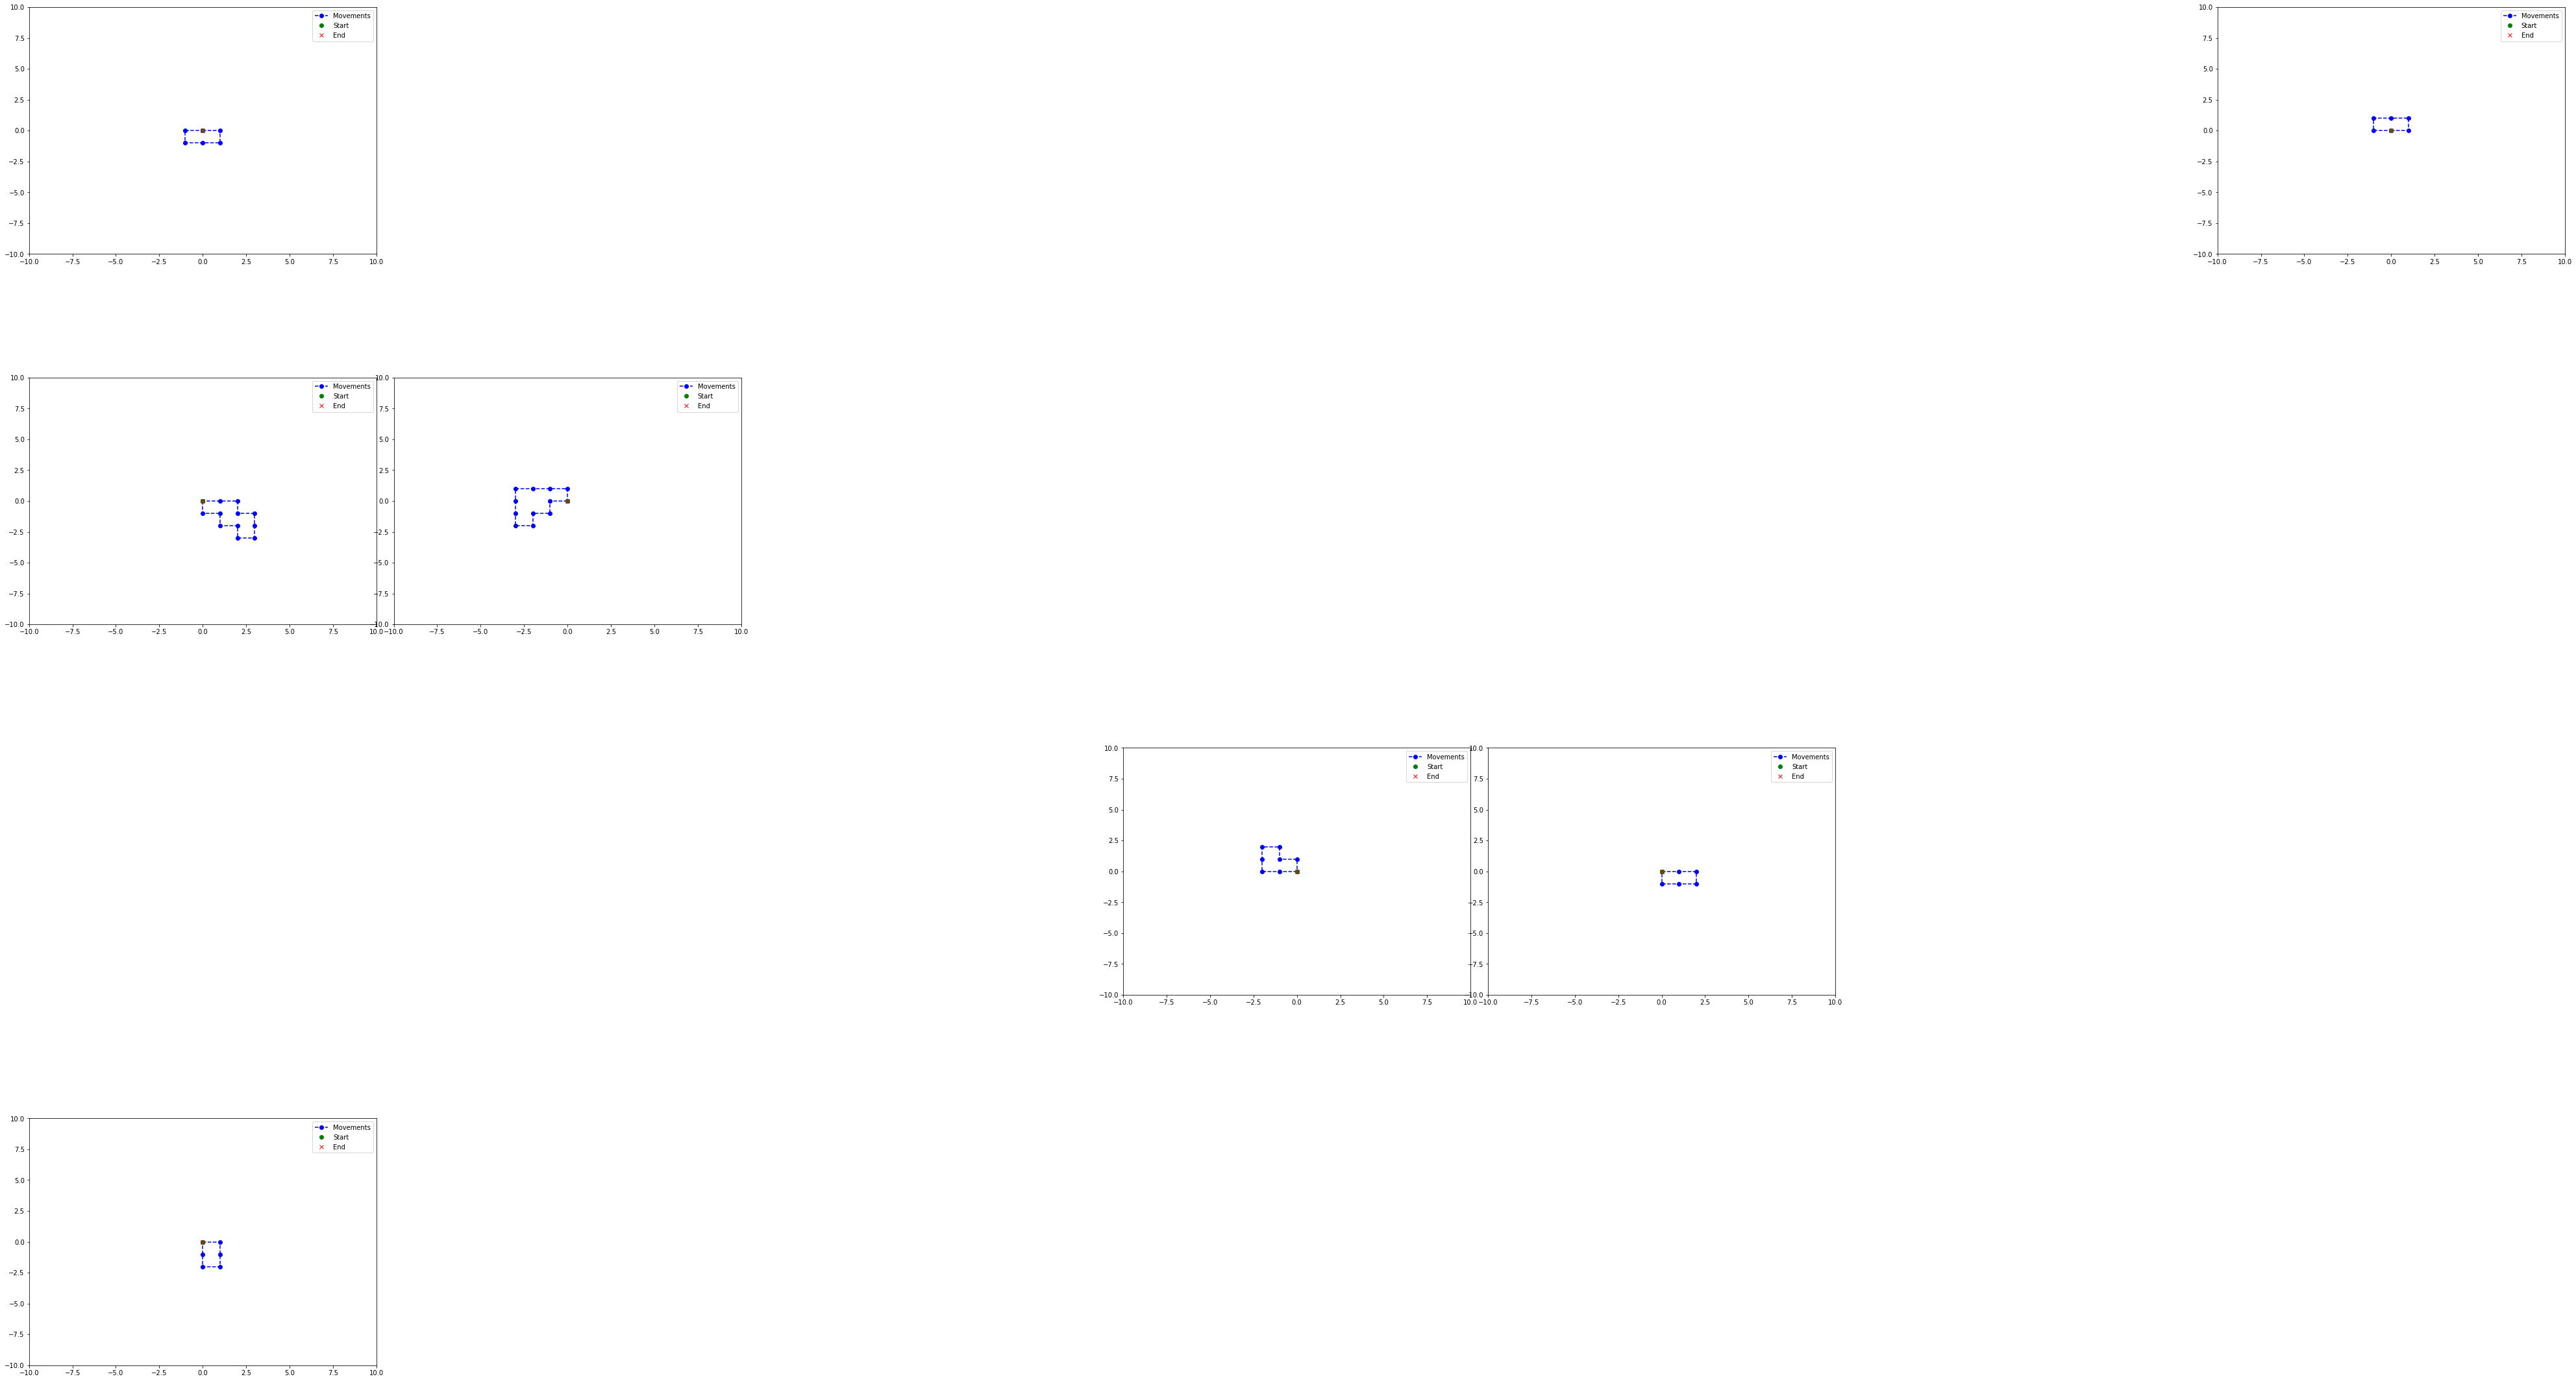

In [ ]:
SimularGrafico(15, 30)

Numero de Pasos Por el SARW 2 : 8 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 5 : 8 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 20 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 23 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 25 : 10 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 30 : 10 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 45 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 50 : 8 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 53 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 54 : 8 De 15 pasos habiles, y recorrio un numero Even de Pasos
Numero de Pasos Por el SARW 57 : 6 De 15 pasos habiles, y recorrio un numero Even de Pasos

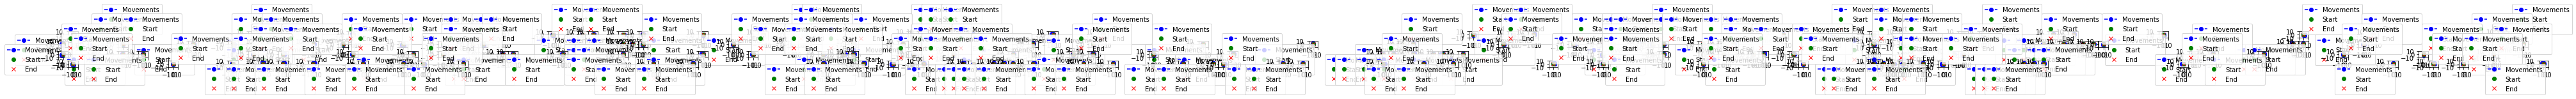

In [ ]:
SimularGrafico(15, 1000)

In [ ]:
Simular(15, 1000000)

La Probabilidad de que el SARW REGRESE Al ORIGEN ES DE 0.176985 La probabilidad de que el numero de pasos sea ODD 0.0 La probabilidad de que el numero de pasos sea EVEN 1.0
El numero Promedio de pasos es:  8.592513489843773


#Optional:

* Answer the questions above for a traditional SARW (the origin cannot be visited).

La probabilidad es de 0 ya que el ejericio no permite visitar el origen.